# Estimativa Fase Quantica (QPE)


---

### Objetivo

Demonstrar o funcionamento do algoritmo **Quantum Phase Estimation (QPE)**, que permite estimar a fase $\varphi$ associada a um autovalor $e^{2\pi i \varphi}$ de uma operação unitária $U$, quando o qubit alvo está preparado em um autovetor conhecido de $U$.

---

### Contexto Teórico

A ideia central é estimar a fase associada ao autovalor de um operador unitário $U$, dado que sabemos um de seus autovetores $|\psi\rangle$:

$$
U|\psi\rangle = e^{2\pi i \varphi}|\psi\rangle
$$

O algoritmo converte essa fase $\varphi$ em uma **medição digital** no registrador de estimação.

---

### Etapas do Algoritmo

1. **Inicialização:**
   - $n$ qubits de estimação em $|0\rangle$
   - 1 qubit alvo preparado em um autovetor de $U$

2. **Superposição:**
   - Aplicamos portas Hadamard aos qubits de estimação

3. **Aplicações controladas de $U^{2^k}$:**
   - Cada qubit de estimação controla uma potência de $U$ no qubit alvo

4. **Inversão da Transformada de Fourier Quântica (QFT⁻¹):**
   - Converte a fase codificada nos qubits em uma forma mensurável

5. **Medição:**
   - Observamos os qubits de estimação para obter uma aproximação binária de $\varphi$

---

### 🔬 O que será demonstrado neste experimento?

- A construção passo a passo do algoritmo QPE
- O papel do *phase kickback* na propagação da fase
- A aplicação das potências controladas de $U$
- O uso da **QFT inversa** para decodificar a fase
- A estimativa de $\varphi$ como uma fração binária
- Visualizações com:
  - Vetor de estado
  - Esferas de Bloch
  - Histogramas de medição


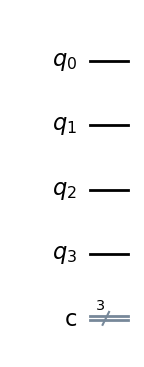

In [1]:
#Bibliotecas
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

#Configuração simulador
simulator = AerSimulator()

#Cria um circuito quantico 3 qubits de estimação (q0,q1,q2) + 1 alvo (q3)
qc = QuantumCircuit(4, 3)  # 4 qubits, 3 registradores classicos

#Visualização do circuito  
qc.draw('mpl');

#### Preparação Qubit Alvo $|1\rangle$

A operação $U$ será definida como uma rotação de fase condicional, que deixa o estado $|0\rangle$ inalterado e aplica uma fase $e^{2\pi i\varphi}$ ao estado $|1\rangle$. Assim, $|1\rangle$ se comporta como autovetor de $U$, com autovalor $e^{2\pi i\varphi}$.

  
- Assim, conseguimos relacionar diretamente a fase $\varphi$ com o autovalor do estado $|1\rangle$.   
  
$$
U |1\rangle = e^{2\pi i \varphi} |1\rangle
\quad \text{e} \quad
U |0\rangle = |0\rangle
$$
  
Ao colocar o qubit alvo em $|1\rangle$, garantimos que a fase $\varphi$ da operação $U$ seja corretamente transferida para os qubits de estimação. 

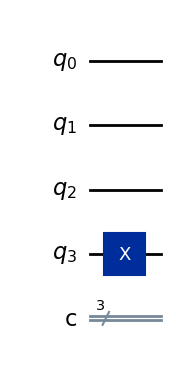

In [2]:
#Porta Not no qubit alvo q3
qc.x(3)

#Visualização do circuito
qc.draw('mpl');

## Mapeamento do Vetor de Estado (4 Qubits)

Cada número complexo representa a **amplitude de probabilidade** associada a um dos estados básicos de 4 qubits:

$|0000\rangle,\ |0001\rangle,\ |0010\rangle,\ \ldots,\ |1111\rangle$

A **probabilidade** de colapsar em cada estado ao medir é o módulo ao quadrado da amplitude.

Se a amplitude quântica de um estado é um número complexo  
$$
\alpha = a + ib,
$$

então a **probabilidade \(P\)** de medir esse estado é dada por:

$$
P = |\alpha|^2 = a^2 + b^2.
$$

---

| Índice | Estado       | Amplitude       | Probabilidade |
|--------|--------------|-----------------|---------------|
| 0      | $|0000\rangle$ | $0.0 + 0.0j$    | 0%            |
| 1      | $|0001\rangle$ | $0.0 + 0.0j$    | 0%            |
| 2      | $|0010\rangle$ | $0.0 + 0.0j$    | 0%            |
| 3      | $|0011\rangle$ | $0.0 + 0.0j$    | 0%            |
| 4      | $|0100\rangle$ | $0.0 + 0.0j$    | 0%            |
| 5      | $|0101\rangle$ | $0.0 + 0.0j$    | 0%            |
| 6      | $|0110\rangle$ | $0.0 + 0.0j$    | 0%            |
| 7      | $|0111\rangle$ | $0.0 + 0.0j$    | 0%            |
| 8      | $|1000\rangle$ | $1.0 + 0.0j$    | **100%**      |
| 9      | $|1001\rangle$ | $0.0 + 0.0j$    | 0%            |
| 10     | $|1010\rangle$ | $0.0 + 0.0j$    | 0%            |
| 11     | $|1011\rangle$ | $0.0 + 0.0j$    | 0%            |
| 12     | $|1100\rangle$ | $0.0 + 0.0j$    | 0%            |
| 13     | $|1101\rangle$ | $0.0 + 0.0j$    | 0%            |
| 14     | $|1110\rangle$ | $0.0 + 0.0j$    | 0%            |
| 15     | $|1111\rangle$ | $0.0 + 0.0j$    | 0%            |


In [3]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere 

Podemos observar o estado dos qubits na esfera de Bloch e verificar qubit q3 está apontando para o **ponto sul da esfera**, correspondente ao estado $|1\rangle$.

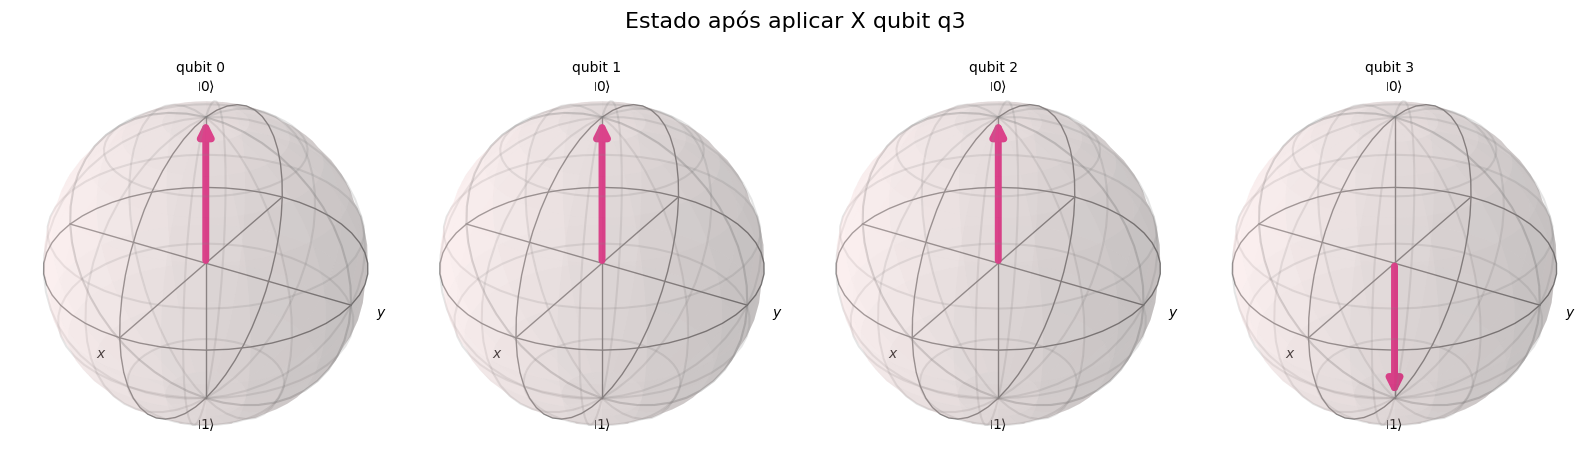

In [4]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado após aplicar X qubit q3");

⚠️ Atenção: A função plot_bloch_multivector exibe os qubits na ordem $q0$ → $q^{N-1}$ (de cima para baixo), enquanto o circuito desenhado mostra q0 no topo e q3 na base.
Por isso, a esfera de q3 aparece por último na visualização, o que pode parecer invertido em relação ao circuito.

### Colocando os qubits de estimação em superposição

Aplicamos a porta de **Hadamard** ($H$) em cada um dos três qubits de estimação: $q_0$, $q_1$ e $q_2$.    

A porta Hadamard transforma um qubit que está no estado base $|0\rangle$ em uma superposição igual de $|0\rangle$ e $|1\rangle$:

$$
H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}
$$ 

Essa superposição permite que o algoritmo explore **todas as possíveis fases ao mesmo tempo**, em paralelo — um dos principais poderes da computação quântica.

Isso significa que o registrador representa uma **superposição de todos os números binários de 3 bits** — desde $|000\rangle$ até $|111\rangle$ — cada um com a mesma amplitude (probabilidade igual).


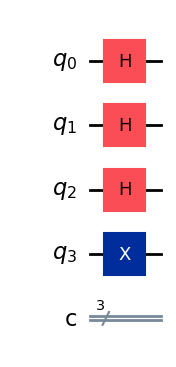

In [5]:
#Qubits de estimação em superposição (|0> + |1>)/√2)
qc.h(0)  # Hadamard no qubit q0
qc.h(1)  # Hadamard no qubit q1
qc.h(2)  # Hadamard no qubit q2

#Visualização do circuito
qc.draw('mpl');

In [6]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Podemos observar que os 3 qubits de estimação estão no estado esperado, apontando para o plano X da esfera de Bloch — superposição $(|0\rangle + |1\rangle)/\sqrt{2}$.

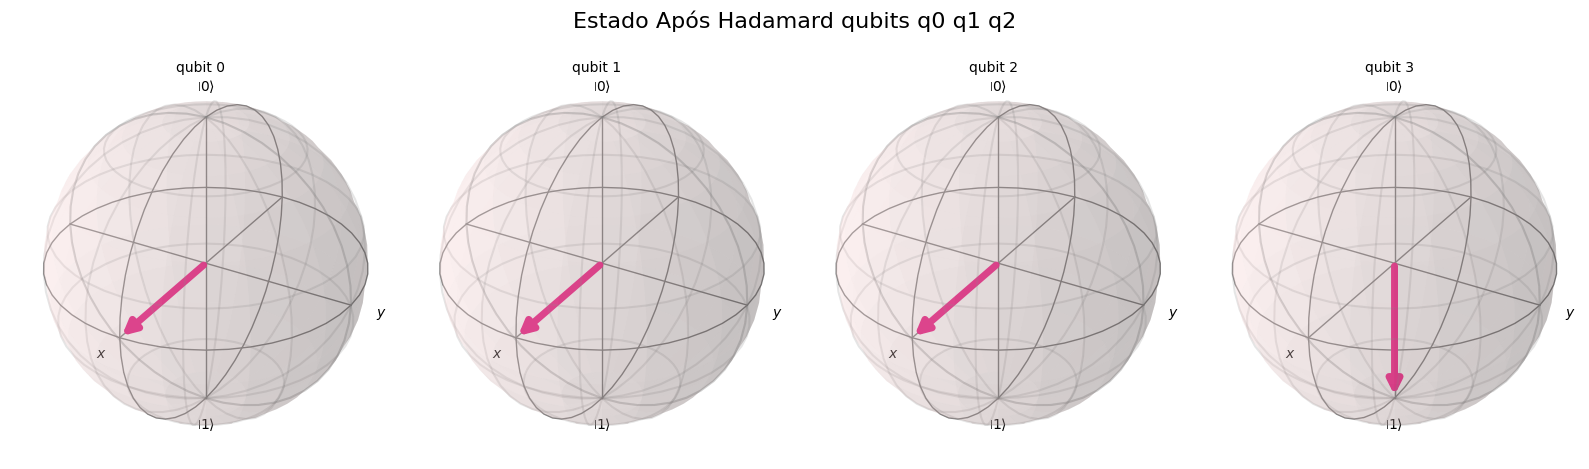

In [7]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado Após Hadamard qubits q0 q1 q2");

## Aplicação das potências de $U$ de forma controlada

Agora que o registrador de estimação está em superposição, aplicamos as operações controladas que associam a fase $\varphi$ ao estado. 

O fenômeno de phase kickback faz com que, ao aplicar uma rotação controlada pelo qubit de estimação sobre o qubit alvo, a fase seja efetivamente "transferida de volta" para o qubit de controle

---

### Operador unitário escolhido

A operação unitária $U$ utilizada é uma rotação de fase em torno do eixo Z da esfera de Bloch, definida por:

$$
U = \begin{bmatrix}
1 & 0 \\
0 & e^{2\pi i \varphi}
\end{bmatrix}
$$

Para este exemplo, escolhemos: fase de $\frac{1}{8}$, uma fração simples que pode ser representada exatamente com 3 bits $(\frac{1}{8} = 0.001_2)$.

$$
\varphi = \frac{1}{8} \implies U = \begin{bmatrix}
1 & 0 \\
0 & e^{2\pi i \cdot \frac{1}{8}} = e^{i\pi/4}
\end{bmatrix}
$$

Essa matriz preserva o estado $|0\rangle$ e aplica uma fase relativa $e^{i\pi/4}$ ao estado $|1\rangle$.

---

### Aplicação da fase no estado $|1\rangle$

Se aplicarmos $U$ ao estado $|1\rangle$, temos:

$$
U |1\rangle = e^{i\pi/4} |1\rangle
$$

Ou seja, o estado recebe apenas uma fase multiplicativa. Como estamos interessados na fase relativa (que será lida nos qubits de estimação), essa informação será transmitida por meio do controle.

---

### Implementar $U^{2^k}$

No Qiskit, usamos a porta **cp** (Controlled-Phase) para aplicar uma rotação de fase de $\theta$ ao qubit alvo, controlada por outro qubit.


No nosso exemplo, com $\varphi = \frac{1}{8}$:

| Qubit de controle | Potência $2^k$ | Ângulo $(\theta = 2\pi \cdot 2^k \cdot \varphi)$                  |
|-------------------|----------------|-----------------------------------|
| $q_0$             | $2^0 = 1$      |   $2\pi \cdot \frac{1}{8} = \frac{\pi}{4}$   | 
| $q_1$             | $2^1 = 2$      |   $2\pi \cdot \frac{2}{8} = \frac{\pi}{2}$   | 
| $q_2$             | $2^2 = 4$      |   $2\pi \cdot \frac{4}{8} = \pi$             |

Essas portas são aplicadas de forma controlada pelos respectivos qubits de estimação e atuam sobre o qubit alvo, que está no estado $|\psi\rangle = |1\rangle$, um autovetor de $U$.

Existem outras formas de implementar $U^{2^k}$. Neste notebook adotamos o uso direto das portas **cp** (Controlled-Phase) para facilitar o entendimento. Essa abordagem permite visualizar de forma clara como a fase se acumula em cada qubit de estimação.

### Aplicando $U^{2^0} = U^1$ controlado por q0

Estamos aplicando a porta **cp** apenas uma vez neste passo, estamos simulando $U^1$. Isso corresponde a acumular uma fase $\varphi = \frac{1}{8}$ sobre o qubit alvo se o qubit de controle estiver no estado $|1\rangle$.


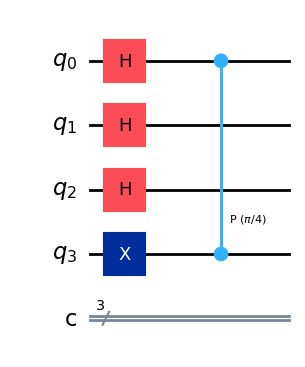

In [8]:
#Para o qubit q0 (k=0, 2^0=1 aplicação)
qc.cp(np.pi/4, 0, 3)  # 1ª aplicação U controlada por q0 alvo q3

#Visualização do circuito
qc.draw('mpl');

In [9]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([0.        +0.j  , 0.        +0.j  , 0.        +0.j  ,
             0.        +0.j  , 0.        +0.j  , 0.        +0.j  ,
             0.        +0.j  , 0.        +0.j  , 0.35355339+0.j  ,
             0.25      +0.25j, 0.35355339+0.j  , 0.25      +0.25j,
             0.35355339+0.j  , 0.25      +0.25j, 0.35355339+0.j  ,
             0.25      +0.25j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Após o acúmulo de fase o qubit q0 de estimação agora influencia condicionalmente o qubit alvo, que “reflete” essas fases, por meio do phase kickback.

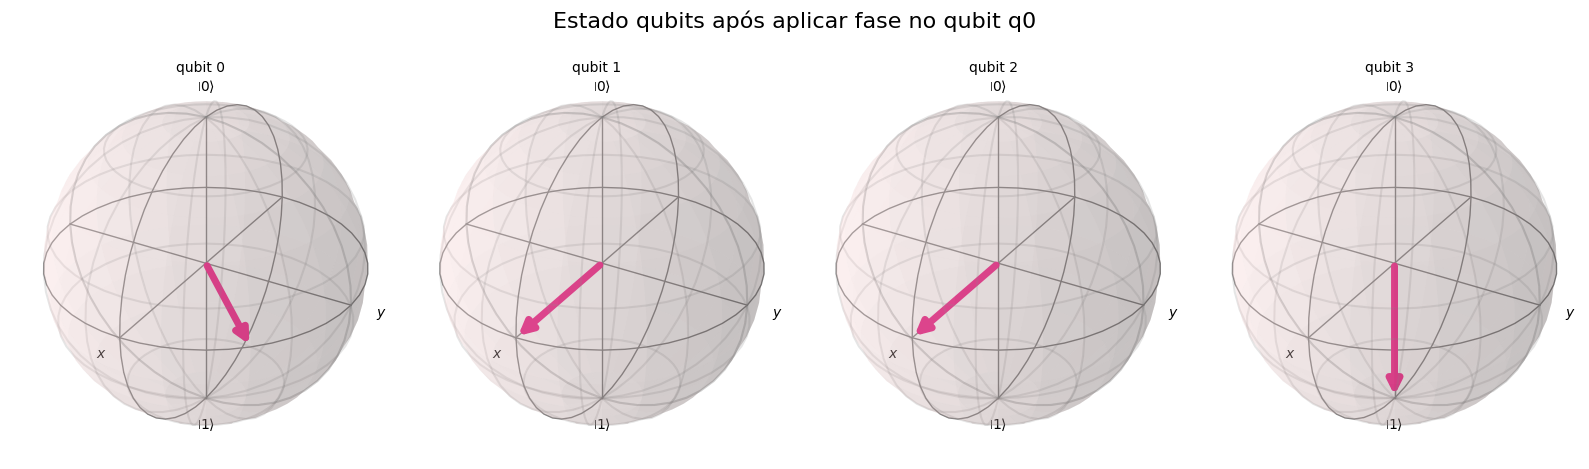

In [10]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado qubits após aplicar fase no qubit q0");

### 🔁 Aplicando $U^{2^1} = U^2$ controlado por q1

Estamos aplicando a porta **cp** duas vezes neste passo, estamos simulando $U^2$ sobre o qubit alvo — mas somente se o qubit alvo q3 estiver no estado $|1\rangle$.

$$
U = Cp\left(\frac{\pi}{4}\right) \Rightarrow U^2 = Cp\left(\frac{\pi}{2}\right)
$$

A aplicação dessa operação controlada acumula uma **fase total** de:

$$
\varphi_{\text{total}} = 2 \times \frac{1}{8} = \frac{1}{4}
$$

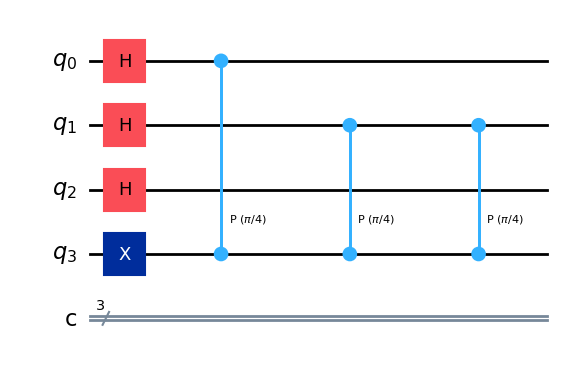

In [11]:
#Para o qubit q1 (k=1, 2^1=2 aplicações)
qc.cp(np.pi/4, 1, 3)  # 1ª aplicação U controlada por q1 alvo q3
qc.cp(np.pi/4, 1, 3)  # 2ª aplicação U controlada por q1 alvo q3

#Visualização do circuito
qc.draw('mpl');

In [12]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              3.53553391e-01+0.j        ,  2.50000000e-01+0.25j      ,
              5.55111512e-17+0.35355339j, -2.50000000e-01+0.25j      ,
              3.53553391e-01+0.j        ,  2.50000000e-01+0.25j      ,
              5.55111512e-17+0.35355339j, -2.50000000e-01+0.25j      ],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Após o acúmulo de fase o qubit q1 de estimação agora influencia condicionalmente o qubit alvo, que “reflete” essas fases, por meio do phase kickback.

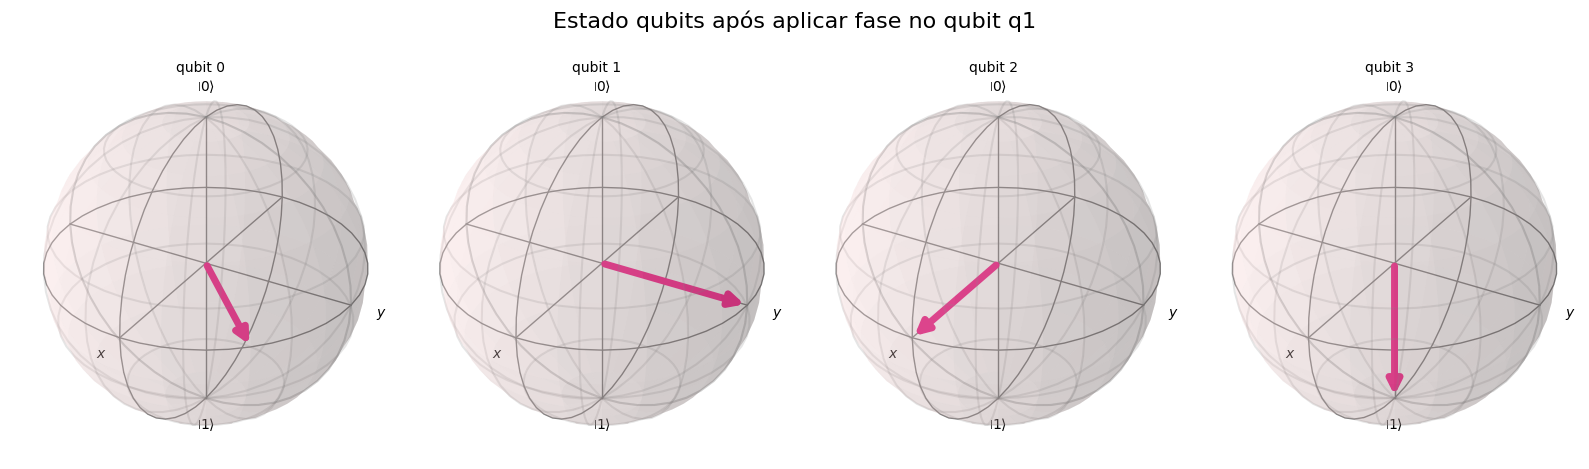

In [13]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado qubits após aplicar fase no qubit q1");

### 🔁 Aplicando $U^{2^2} = U^4$ controlado por q2

Estamos aplicando a porta **cp** quatro vezes neste passo, estamos simulando $U^4$ sobre o qubit alvo — mas somente se o qubit de controle **q3** estiver no estado $|1\rangle$.

$$
U = Cp\left(\frac{\pi}{4}\right) \Rightarrow U^4 = Cp\left(\pi\right)
$$

A aplicação dessa operação controlada acumula uma **fase total** de:

$$
\varphi_{\text{total}} = 4 \times \frac{1}{8} = \frac{1}{2}
$$


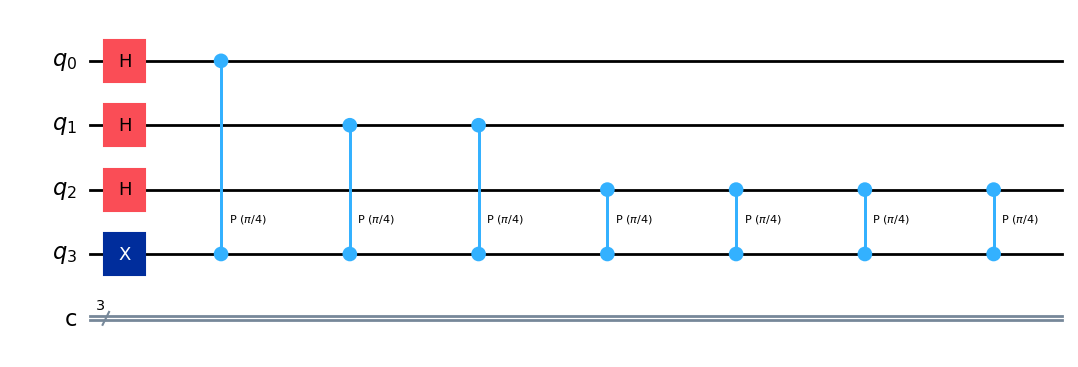

In [14]:
#Para o qubit q2 (k=2, 2^2=4 aplicações)
qc.cp(np.pi/4, 2, 3)  # 1ª aplicação U controlada por q2 alvo q3
qc.cp(np.pi/4, 2, 3)  # 2ª aplicação U controlada por q2 alvo q3
qc.cp(np.pi/4, 2, 3)  # 3ª aplicação U controlada por q2 alvo q3
qc.cp(np.pi/4, 2, 3)  # 4ª aplicação U controlada por q2 alvo q3

#Visualização do circuito
qc.draw('mpl');

In [15]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma um objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.53553391e-01+0.00000000e+00j,
              2.50000000e-01+2.50000000e-01j,
              5.55111512e-17+3.53553391e-01j,
             -2.50000000e-01+2.50000000e-01j,
             -3.53553391e-01+1.38777878e-16j,
             -2.50000000e-01-2.50000000e-01j,
             -1.66533454e-16-3.53553391e-01j,
              2.50000000e-01-2.50000000e-01j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Após o acúmulo de faseo qubit q2 de estimação agora influencia condicionalmente o qubit alvo, que “reflete” essas fases, por meio do phase kickback.

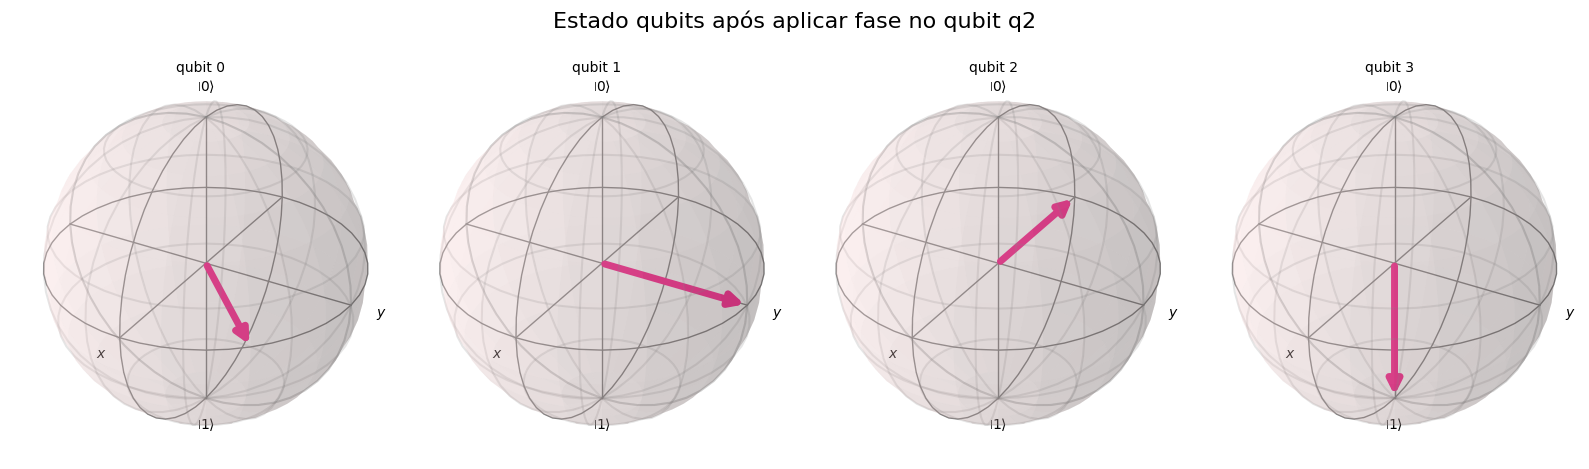

In [16]:
#Visualização na Bloch Sphere dos qubits

plot_bloch_multivector(state, title="Estado qubits após aplicar fase no qubit q2");

Neste ponto, cada qubit de estimação (q0, q1, q2) contribuiu com um acúmulo de fase proporcional a $2^k \cdot \varphi$, onde $\varphi = 1/8$.

Embora os qubits de estimação ainda não estejam colapsados, eles já codificam a fase φ nas amplitudes relativas dos estados base. Essa codificação será decodificada pela QFT inversa para estimar $\varphi$.

## Extrair informação em forma digital

### Aplicação da QFT Inversa

Agora que a fase $\varphi$ está codificada nas amplitudes do registrador de estimação, aplicamos a **Transformada de Fourier Quântica Inversa (QFT$^\dagger$)** para extrair essa informação em forma digital.
   
**Fórmula Geral dos ângulos dos CP na QFT⁻¹**

Se você tem $n$ qubits numerados da esquerda para a direita como $( q_0, q_1, \ldots, q_{n-1} )$:

Para cada par de qubits com controle $( q_j)$ e alvo $( q_k)$, com $( j < k)$, o ângulo aplicado é:

$$
\theta = -\frac{\pi}{2^{k - j}}
$$

Ou seja:

| Controle | Alvo | Ângulo  |
|----------|-------|---------|
| $( q_0)$ | $( q_1)$ | $(-\pi/2)$  |
| $( q_0)$ | $( q_2)$ | $(-\pi/4)$  |
| $( q_1)$ | $( q_2)$ | $(-\pi/2)$  |


Esses ângulos não estão relacionados diretamente às portas U usadas para codificar a fase, mas sim à estrutura matemática da QFT inversa. Eles são escolhidos para "cancelar" as fases relativas introduzidas na QFT direta

Aplicamos uma sequência de **portas de Hadamard** e **rotações condicionais** (portas **cp** com ângulos negativos) para remover as fases relativas entre os qubits.

   Essas rotações implementam as matrizes conjugadas das rotações de fase usadas na QFT direta:

   $$
   Cp^\dagger = \begin{bmatrix}
   1 & 0 \\
   0 & e^{-2\pi i / 2^k}
   \end{bmatrix}
   $$

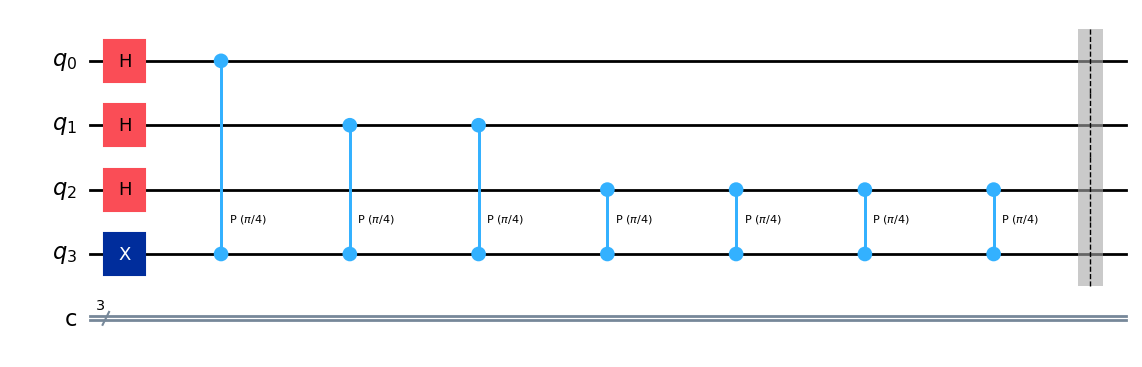

In [17]:
#Adiciona uma barreira para separar visualmente as etapas
qc.barrier()  

#Visualização do circuito
qc.draw('mpl');

Converte a interferência quântica (fase) em q2 para amplitude (Coloca o qubit na base computacional)

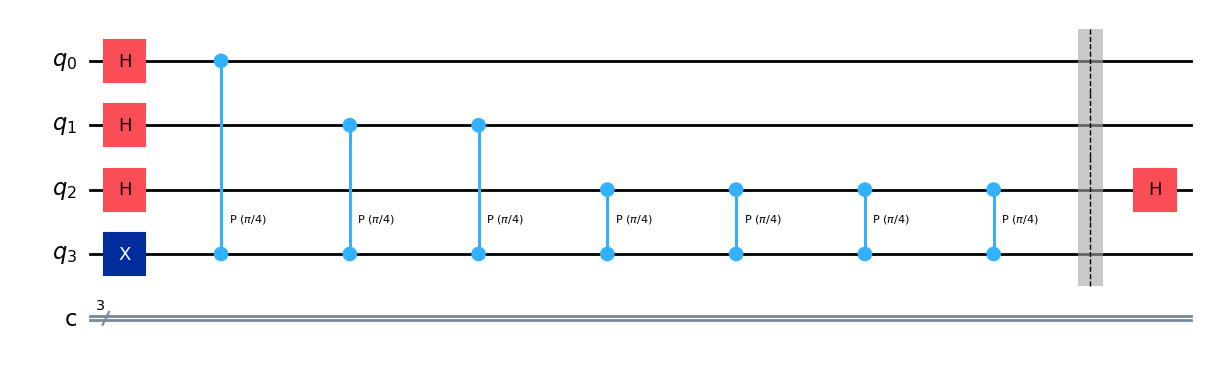

In [18]:
#Hadamard no qubit q2
qc.h(2)  

#Visualização do circuito
qc.draw('mpl');

In [19]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+1.28746949e-16j,
              0.00000000e+00+1.66533454e-16j,
             -1.09120793e-16+1.38777878e-16j,
             -1.38777878e-16+2.77555756e-17j,
              5.00000000e-01-1.28746949e-16j,
              3.53553391e-01+3.53553391e-01j,
              1.87625416e-16+5.00000000e-01j,
             -3.53553391e-01+3.53553391e-01j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Podemos observar o sistema após converter a interferência quântica (fase acumulada) do qubit q2 em amplitude mensurável na base computacional.

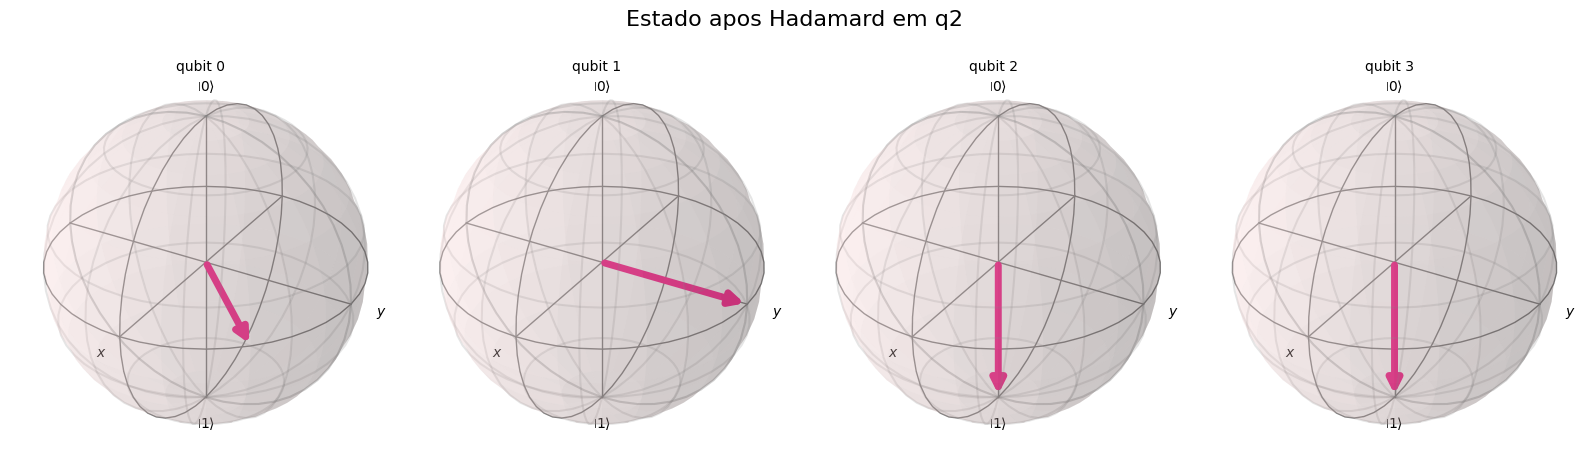

In [20]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado apos Hadamard em q2");

A porta **cp** remove a interferência entre os qubits do registrador de estimação (q1, q2), que agora carregam a fase codificada.

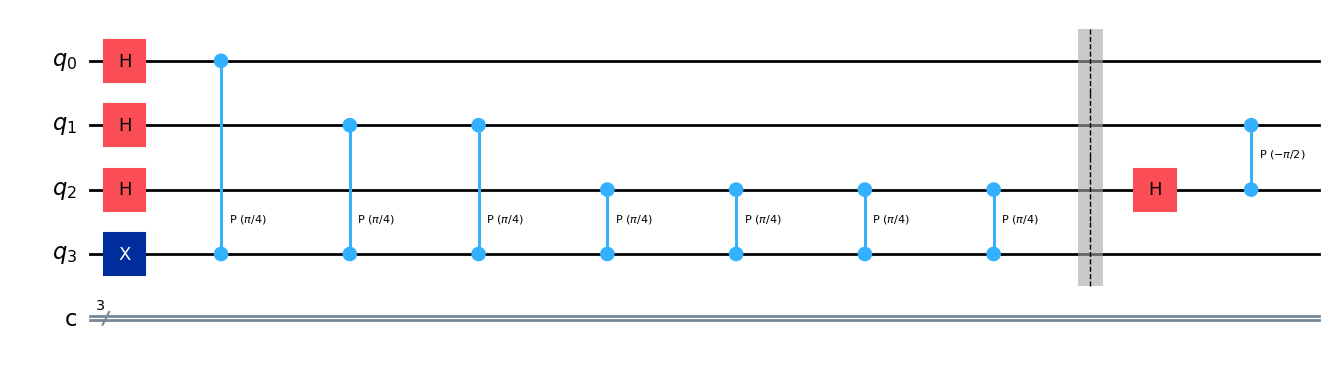

In [21]:
#Porta de fase controlada com ângulo -π/2 para remover a interferencia
qc.cp(-np.pi/2, 1, 2)  # Rotaçao controlada por q1 - remove a fase entre q1 e q2

#Visualização do circuito
qc.draw('mpl');

In [22]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+1.28746949e-16j,
              0.00000000e+00+1.66533454e-16j,
             -1.09120793e-16+1.38777878e-16j,
             -1.38777878e-16+2.77555756e-17j,
              5.00000000e-01-1.28746949e-16j,
              3.53553391e-01+3.53553391e-01j,
              5.00000000e-01-1.57009246e-16j,
              3.53553391e-01+3.53553391e-01j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

A orientação do qubit q1 é alterada após a aplicação da porta **cp** $-\frac{\pi}{2}$, que desfaz parcialmente a correlação de fase entre q1 e q2.

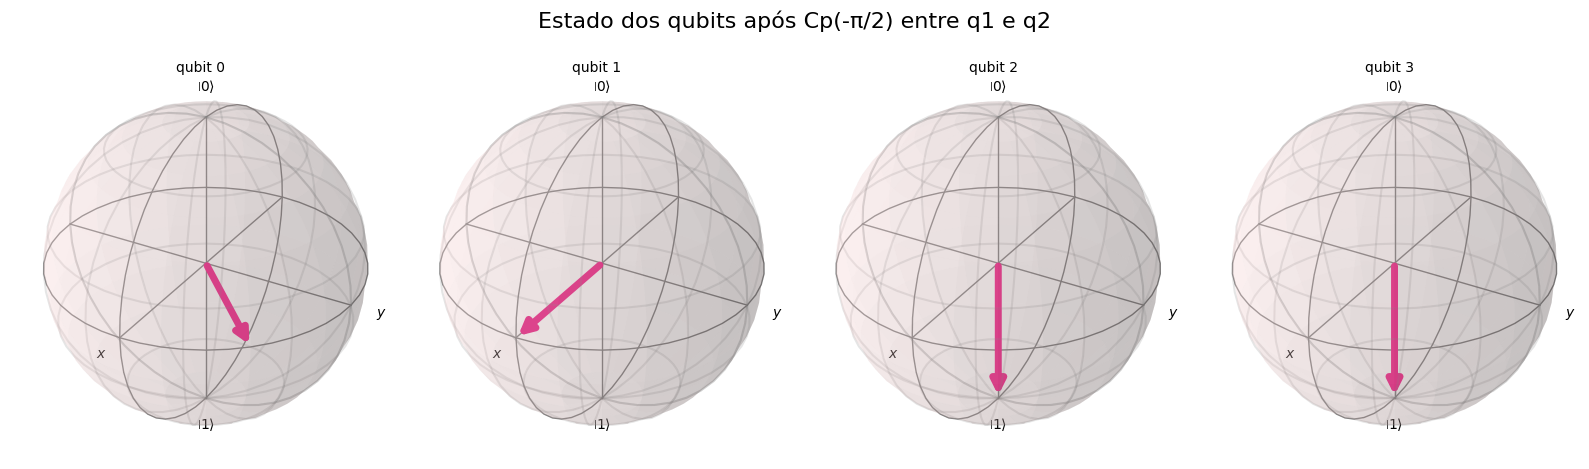

In [23]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado dos qubits após Cp(-π/2) entre q1 e q2");

Converte a interferência quântica (fase) em q1 para amplitude (Coloca o qubit na base computacional)

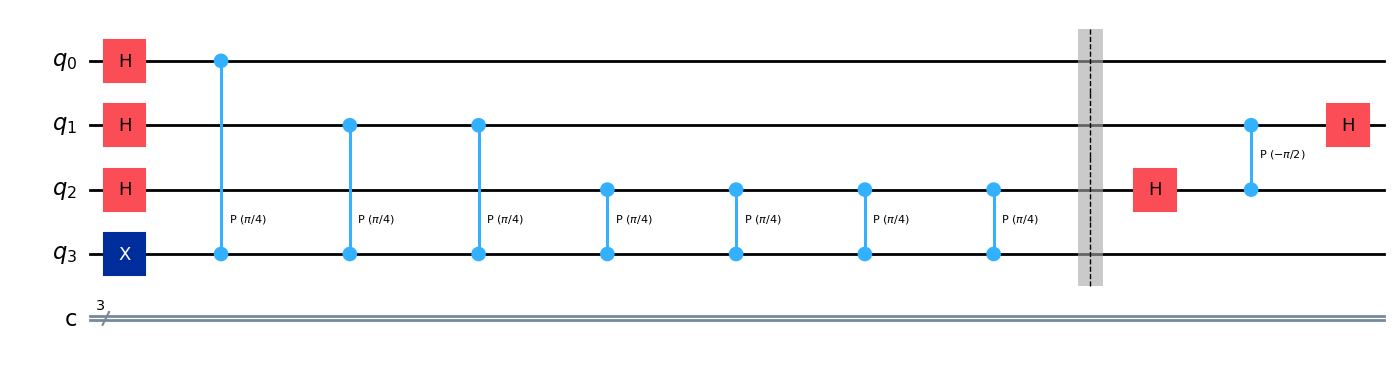

In [24]:
#Hadamard no qubit q1
qc.h(1)  

#Visualização do circuito
qc.draw('mpl');

In [25]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -7.71600526e-17+1.89168619e-16j,
             -9.81307787e-17+1.37383090e-16j,
              7.71600526e-17-7.09293822e-18j,
              9.81307787e-17+9.81307787e-17j,
              7.07106781e-01-2.45357946e-16j,
              5.00000000e-01+5.00000000e-01j,
              5.55111512e-17+6.32822648e-17j,
             -5.55111512e-17+8.32667268e-17j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Podemos observar o sistema após converter a interferência quântica (fase acumulada) do qubit q1 em amplitude mensurável na base computacional.

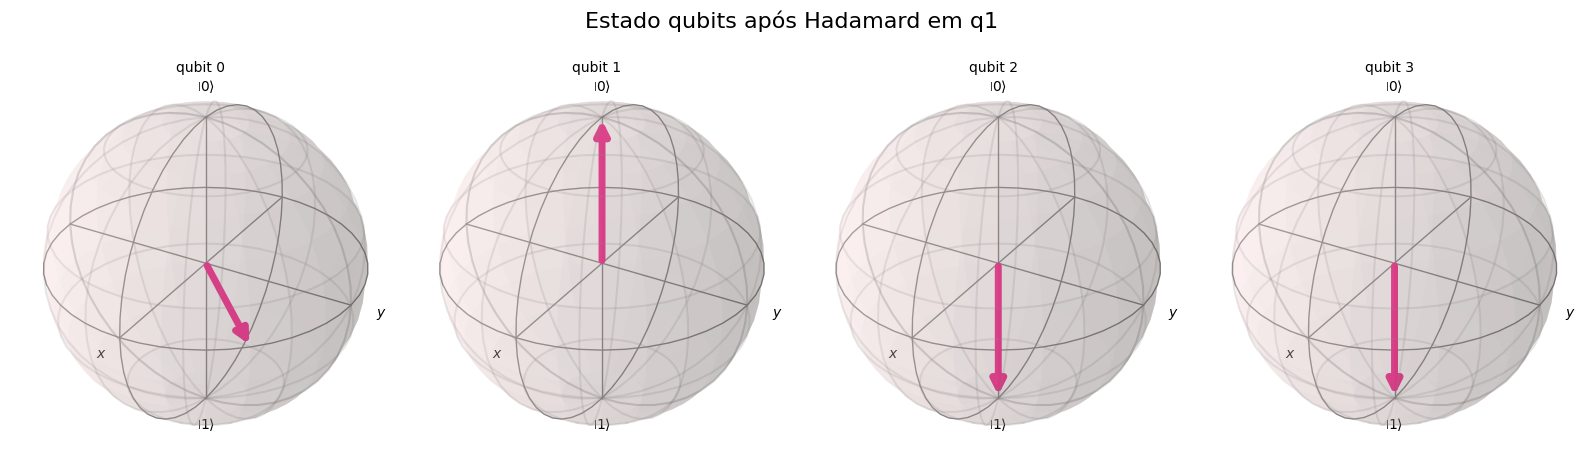

In [26]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado qubits após Hadamard em q1 ");

As portas **cp** estão removendo a interferência entre os qubits do registrador de estimação q0 e q2 (com ângulo -π/4) e entre q0 e q1 (com ângulo -π/2).

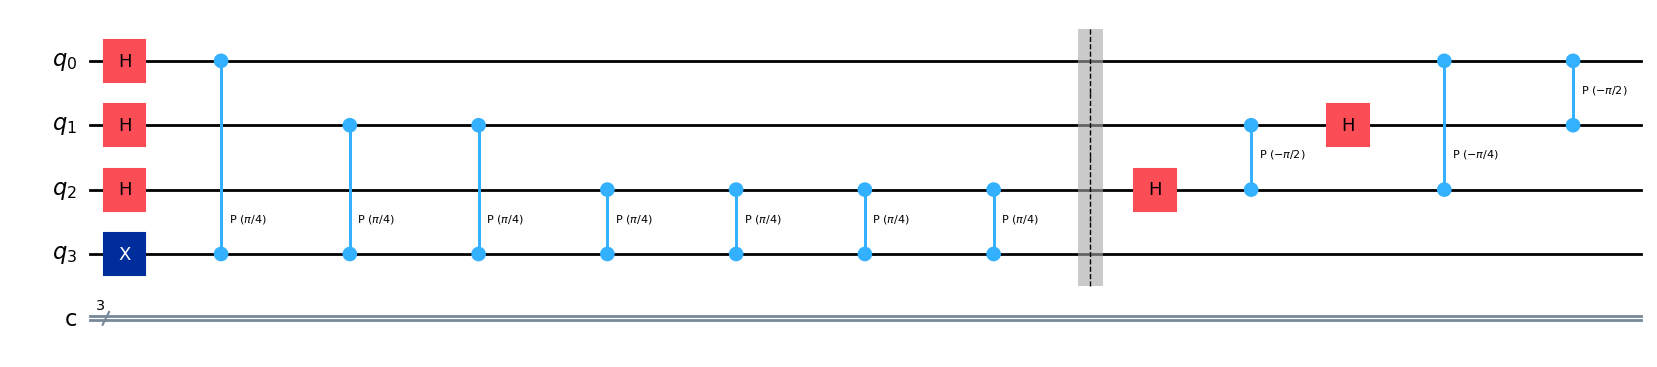

In [27]:
#Porta de fase controlada com ângulo -π/4 e-π/2 para remover a interferencia
qc.cp(-np.pi/4, 0, 2)  # Rotaçao controlada por q0 - remove a fase entre q0 e q2
qc.cp(-np.pi/2, 0, 1)  # Rotaçao controlada por q0 - remove a fase entre q0 e q1

#Visualização do circuito
qc.draw('mpl');

In [28]:
#Extrair vetor de estado
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -7.71600526e-17+1.89168619e-16j,
             -9.81307787e-17+1.37383090e-16j,
              7.71600526e-17-7.09293822e-18j,
              9.81307787e-17-9.81307787e-17j,
              7.07106781e-01-2.45357946e-16j,
              7.07106781e-01-3.33066907e-16j,
              5.55111512e-17+6.32822648e-17j,
              9.81307787e-17-1.96261557e-17j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere
   
A orientação do qubit q0 é alterada após a aplicação das portas **cp** $-\frac{\pi}{4}$ e **cp** $-\frac{\pi}{2}$, que desfazem parcialmente as correlações de fase entre q0 e os qubits q2 e q1.   

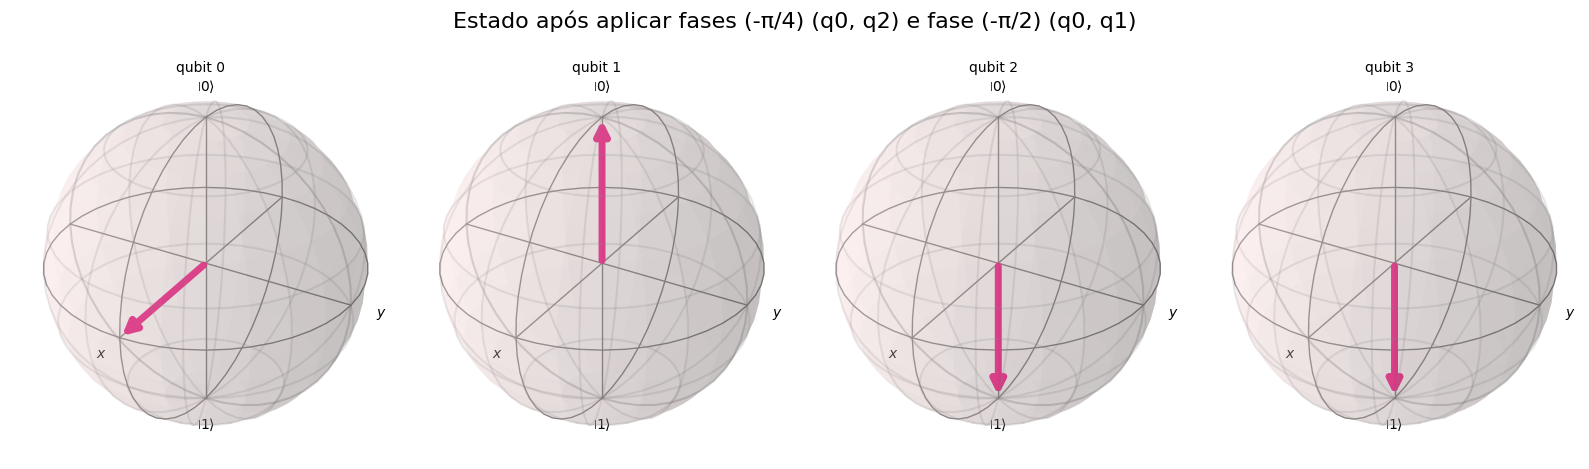

In [29]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado após aplicar fases (-π/4) (q0, q2) e fase (-π/2) (q0, q1)");

Converte a interferência quântica (fase) em q0 para amplitude (Coloca o qubit na base computacional)

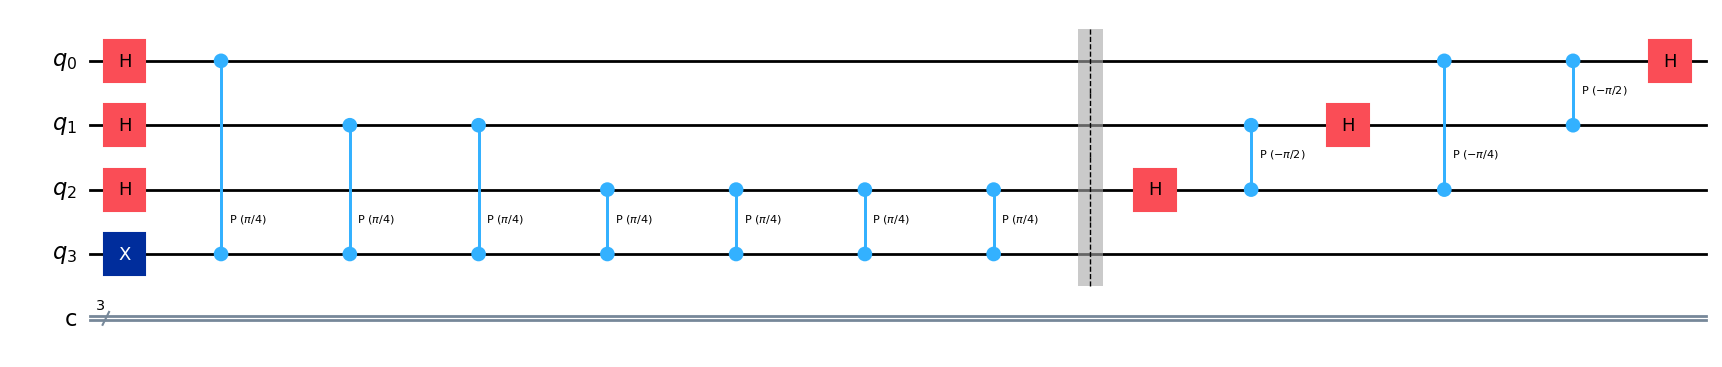

In [30]:
#Hadamard no qubit q0
qc.h(0)  
  
# Visualização do circuito
qc.draw('mpl');

In [31]:
#Visualização do estado do vector
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.23949335e-16+2.30906928e-16j,
              1.48285426e-17+3.66178987e-17j,
              1.23949335e-16-7.44044038e-17j,
             -1.48285426e-17+6.43734743e-17j,
              1.00000000e+00-4.70240476e-16j,
             -1.11022302e-16+1.23251942e-16j,
              1.08641251e-16+3.08695308e-17j,
             -3.01366276e-17+5.86251064e-17j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

Podemos observar o sistema após converter a interferência quântica (fase acumulada) do qubit q0 em amplitude mensurável na base computacional.

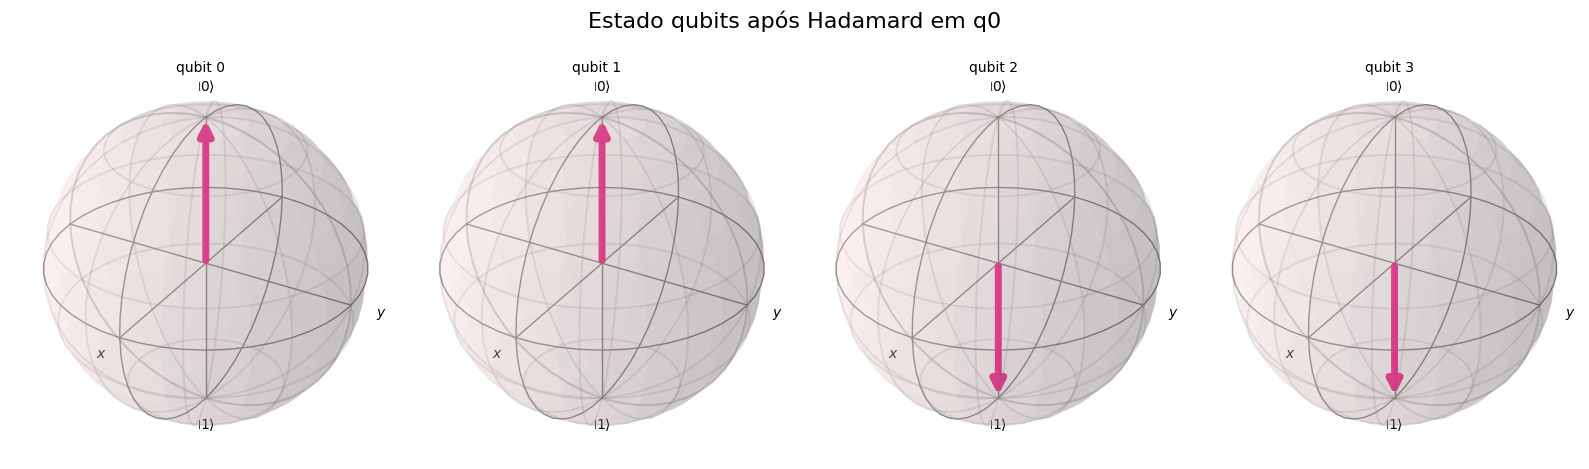

In [32]:
#Visualização na Bloch Sphere dos qubits
plot_bloch_multivector(state, title="Estado qubits após Hadamard em q0");

O SWAP é usado apenas para reorganizar a posição física dos qubits, facilitando a interpretação clássica do resultado final.   
No QPE, após a QFT inversa, os qubits ficam em ordem invertida em relação ao valor binário convencional entao trocamos o q0 com o q2.

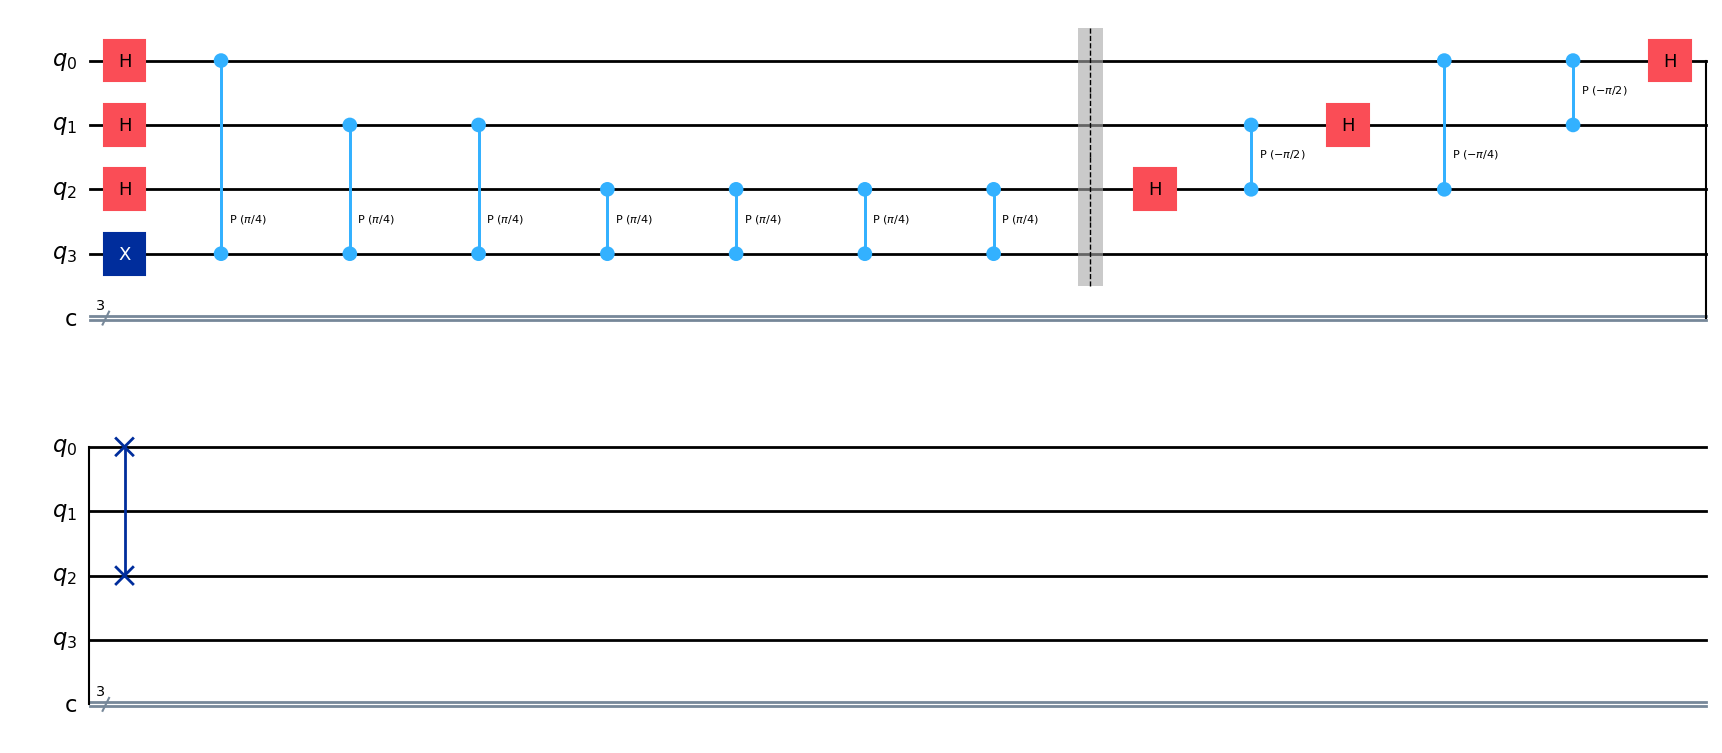

In [33]:
#Swap troca a informacao dos qubits

#Antes - [q0, q1, q2] → LSB ... MSB   (lógico invertido em relação à notação convencional)

qc.swap(0, 2)  # Troca q0 com q2 

#Depois - [q0, q1, q2] → MSB ... LSB   (logico convencional)

# Visualização do circuito final
qc.draw('mpl');

In [34]:
#Visualização do estado do vector
#Copia do circuito original para não alterar o original
qc_temp = qc.copy()

#Salvar vetor de estado final da simulação
qc_temp.save_statevector()

#Executa simulação do circuito e obtém os resultados
result = simulator.run(qc_temp).result()

#Extrai vetor de estado do resultado e transforma em objeto Statevector
state = Statevector(result.get_statevector())

#Exibe vetor de estado
print(state)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.23949335e-16+2.30906928e-16j,
              1.00000000e+00-4.70240476e-16j,
              1.23949335e-16-7.44044038e-17j,
              1.08641251e-16+3.08695308e-17j,
              1.48285426e-17+3.66178987e-17j,
             -1.11022302e-16+1.23251942e-16j,
             -1.48285426e-17+6.43734743e-17j,
             -3.01366276e-17+5.86251064e-17j],
            dims=(2, 2, 2, 2))


### 🔎 Visualização na Bloch Sphere

O sistema final após o troca de informação entre os qubits q0 e q2 para que a leitura represente o valor binário convencional.

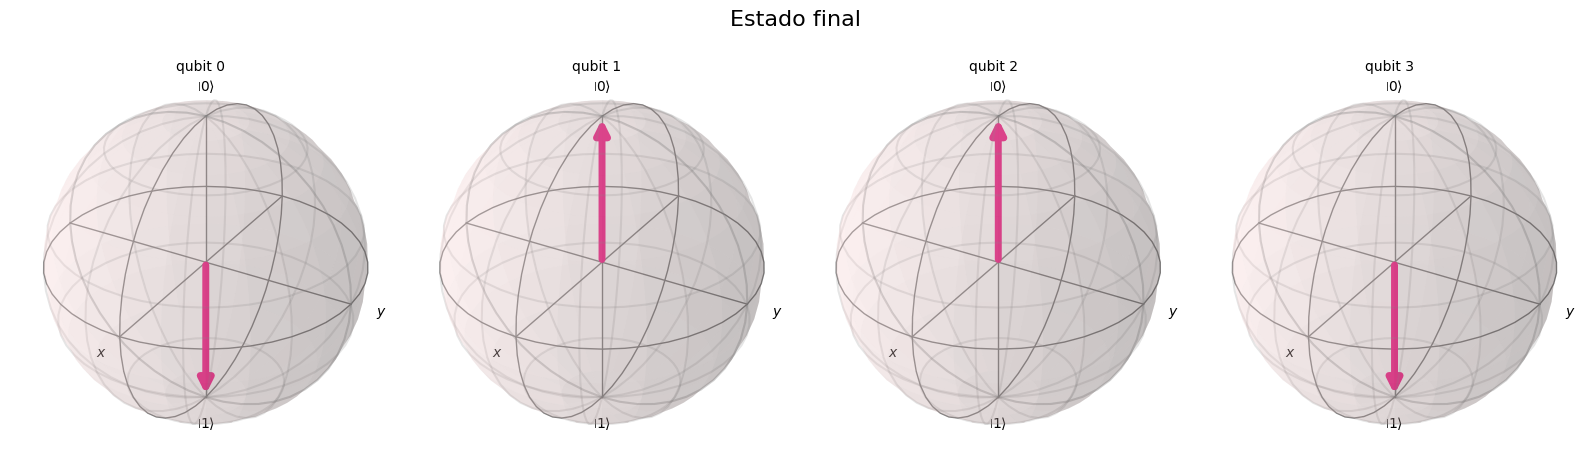

In [35]:
#Visualização na Bloch Sphere dos qubits
#[q0, q1, q2] → MSB ... LSB   (logico convencional)
plot_bloch_multivector(state, title="Estado final");

Medição final do circuito para obter os resultados.

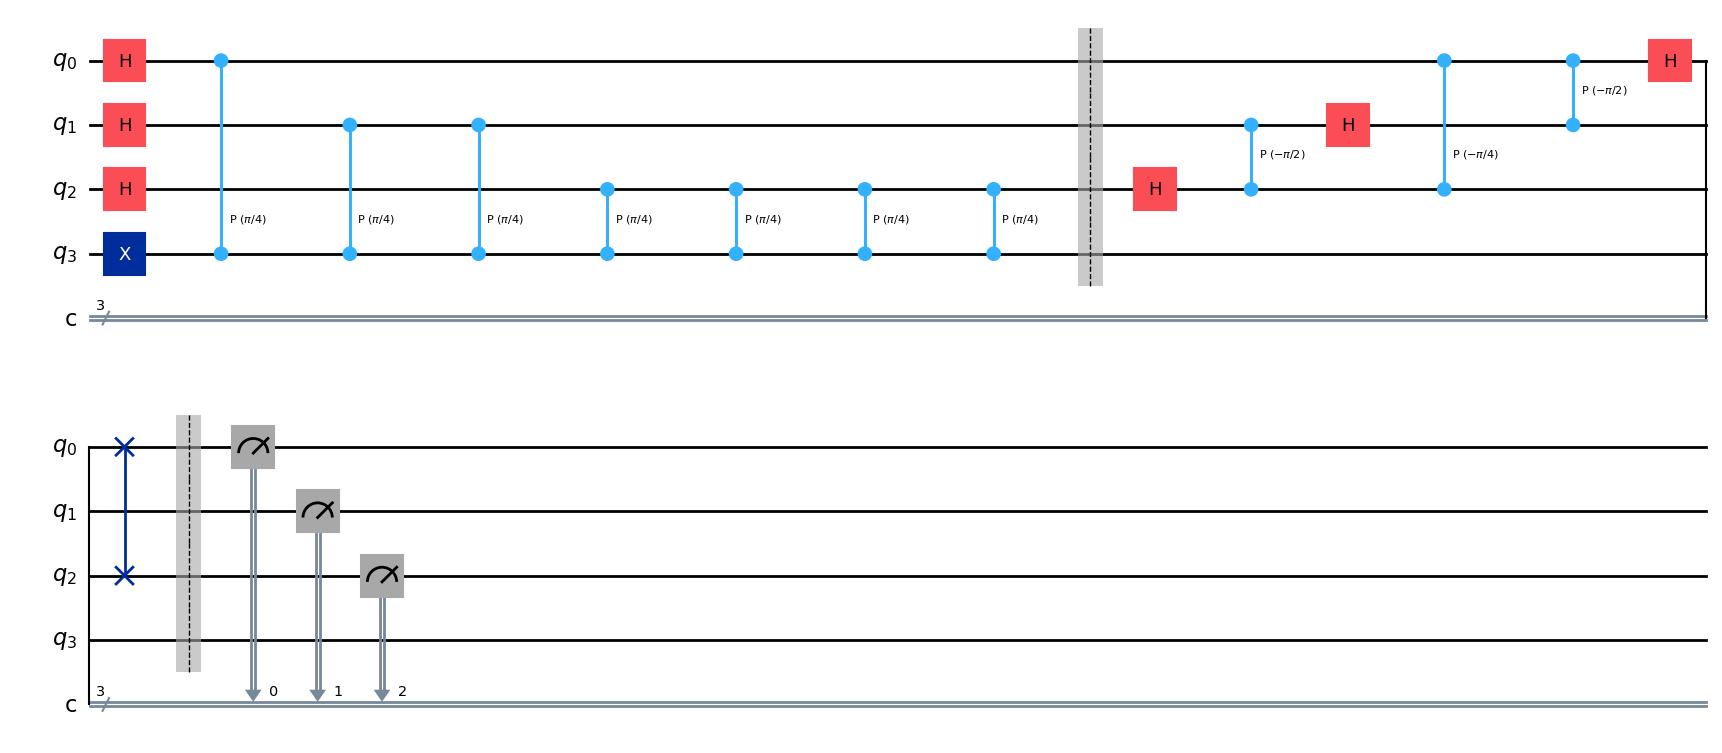

In [36]:
#Adiciona uma barreira para separar visualmente as etapas
qc.barrier()

qc.measure([0,1,2], [0,1,2])  # Mede os qubits q0,q1,q2

#Visualização do circuito final
qc.draw('mpl');

### Estimando a fase após a medição

Depois de aplicarmos a **QFT inversa**, a fase $\varphi$ fica **codificada nas amplitudes** do registrador de estimação. Quando medimos os qubits, eles colapsam para um estado base $|k\rangle$, e esse valor inteiro $k$ nos dá uma **estimativa da fase**:

$$
\varphi \approx \frac{k}{2^n}
$$

No nosso caso, usamos **$n = 3$ qubits**, então os possíveis valores de $k$ vão de 0 a 7:

$$
k = 0, 1, 2, \dots, 7 \quad \Rightarrow \quad \varphi_k = \frac{k}{8}
$$

---

### Fase esperada

No início do algoritmo, definimos a fase que queremos estimar como:

$$
\varphi = \frac{1}{8}
$$

Então esperamos que o resultado da medição seja:

- $k = 1$ → em binário: $|001\rangle$
- q2=0 (MSB), q1=0, q0=1 (LSB) → binário 001
- Fase estimada: $\frac{1}{8} = 0.125$

Esse é o resultado que **mais provavelmente será observado**.


### Visualização

Ao executar o circuito múltiplas vezes, o **histograma final** mostrará a distribuição das frequências de medição para cada resultado possível.


RESULTADOS DA MEDIÇÃO:
{'001': 1024}


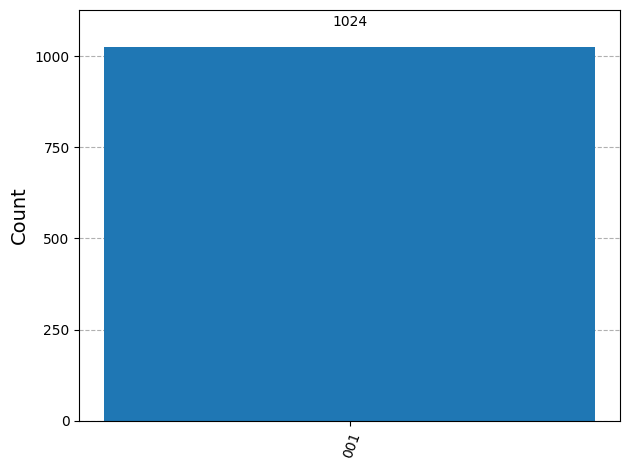

In [37]:
# Execução final
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

print("\nRESULTADOS DA MEDIÇÃO:")
print(counts)
plot_histogram(counts)
plt.show()

### Conclusão

O objetivo desse processo foi estimar uma fase que está codificada em um sistema quântico.
Usamos o phase kickback para transferir essa fase para os qubits de controle, e depois aplicamos a Transformada de Fourier Quântica Inversa para transformar essa informação em algo que podemos medir, ou seja, números binários.

Depois de medir os qubits, conseguimos uma boa estimativa dessa fase em forma digital, que é uma informação importante para vários problemas em computação quântica

## Additional Information

**Created by:** Diego Saran  
**Version:** 1.0   
**Based on:** Concepts from Quantum Computing with Qiskit       
**License:** MIT 
**Date:** August 2025

In [38]:
import qiskit
import qiskit_ibm_runtime

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')

Qiskit: 2.1.1
Qiskit IBM Runtime: 0.40.1
